In [1]:
# import sys
# from pathlib import Path
# root_dir = Path().resolve().parent  # goes one level up from `test/`
# sys.path.insert(0, str(root_dir))

In [2]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotsense import  recommender, plotgen, explainer,explainer2, explain_plot
import openpyxl

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
titanic = sns.load_dataset("titanic")

In [5]:
data = r"PLD Data for Hackathon.xlsx"

In [6]:
hack = pd.read_excel(data, nrows=500)


In [7]:
hack.head()

,Count of id,id,lpa_name,status,valid_date,decision,decision_date,total_gained_units,total_lost_units,Total Net Units,...,remaining_gained_units,remaining_lost_units,actual_commencement_date,actual_completion_date,application_type,application_type_full,description,appeal_decision,appeal_decision_date,development_type
0,1,Wandsworth-2024_4282,Wandsworth,Approved,2024-12-06,Approved,2025-04-22,8,0,8,...,8,0,NaT,NaN,All Other,Full planning permission,Alterations including erection of roof extensi...,NaN,NaT,Minor dwellings
1,1,Barnet-25_0634_FUL,Barnet,Refused,2025-02-21,Refused,2025-04-17,2,2,0,...,2,2,NaT,NaN,All Other,Full planning permission,Two storey side/rear extension with pitched ro...,NaN,NaT,NaN
2,1,Barnet-25_0702_FUL,Barnet,Refused,2025-02-20,Refused,2025-04-17,1,0,1,...,1,0,NaT,NaN,All Other,Full planning permission,Erection of a single storey dwelling. Associat...,NaN,NaT,NaN
3,1,Bexley-25_00319_PRIOR,Bexley,Refused,2025-02-21,Refused,2025-04-17,2,0,2,...,2,0,NaT,NaN,Prior Approval,"Prior Approval: Change of use from Commercial,...",Notification of Prior Approval for change of u...,NaN,NaT,NaN
4,1,Bexley-25_00330_FUL,Bexley,Approved,2025-02-20,Approved,2025-04-17,0,1,-1,...,0,1,NaT,NaN,All Other,Full planning permission,Change of Use from Class C3 (Residential Dwell...,NaN,NaT,NaN


In [8]:
hack.columns

Index(['Count of id', 'id', 'lpa_name', 'status', 'valid_date', 'decision',
       'decision_date', 'total_gained_units', 'total_lost_units',
       'Total Net Units', 'commenced_gained_units', 'completed_gained_units',
       'completed_lost_units', 'Remaining Units Net', 'remaining_gained_units',
       'remaining_lost_units', 'actual_commencement_date',
       'actual_completion_date', 'application_type', 'application_type_full',
       'description', 'appeal_decision', 'appeal_decision_date',
       'development_type'],
      dtype='object')

In [9]:
hack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Count of id               500 non-null    int64         
 1   id                        500 non-null    object        
 2   lpa_name                  500 non-null    object        
 3   status                    483 non-null    object        
 4   valid_date                500 non-null    datetime64[ns]
 5   decision                  498 non-null    object        
 6   decision_date             500 non-null    datetime64[ns]
 7   total_gained_units        500 non-null    int64         
 8   total_lost_units          500 non-null    int64         
 9   Total Net Units           500 non-null    int64         
 10  commenced_gained_units    500 non-null    int64         
 11  completed_gained_units    500 non-null    int64         
 12  completed_lost_units  

In [10]:
recommendation = recommender(hack, n=20)
recommendation

c:\Users\chime\PlotSense_Recloned\PlotSenseAI\plotsense\visual_suggestion\suggestions.py:278: UserWarning: Error processing model llama-3.3-70b-versatile: Groq API query failed for llama-3.3-70b-versatile: Error code: 429 - {'error': {'message': 'Rate limit reached for model `llama-3.3-70b-versatile` in organization `org_01jpckktt3fgct22355yerq2a3` service tier `on_demand` on tokens per day (TPD): Limit 100000, Used 97853, Requested 3485. Please try again in 19m15.824999999s. Need more tokens? Upgrade to Dev Tier today at https://console.groq.com/settings/billing', 'type': 'tokens', 'code': 'rate_limit_exceeded'}}
  warnings.warn(f"Error processing model {model}: {str(e)}")


,plot_type,variables,ensemble_score,model_agreement,source_models
0,bar,"total_gained_units, lpa_name",0.25,1,[llama3-70b-8192]
1,scatter,"total_gained_units, total_lost_units",0.25,1,[llama3-70b-8192]
2,hist,total_gained_units,0.25,1,[llama3-70b-8192]
3,boxplot,"total_gained_units, lpa_name",0.25,1,[llama3-70b-8192]
4,pie,application_type,0.25,1,[llama3-70b-8192]
5,line,"Total Net Units, valid_date",0.25,1,[llama3-70b-8192]
6,scatter,"Remaining Units Net, total_gained_units",0.25,1,[llama3-70b-8192]
7,violinplot,"total_gained_units, lpa_name",0.25,1,[llama3-70b-8192]
8,hexbin,"total_gained_units, total_lost_units",0.25,1,[llama3-70b-8192]
9,pairplot,"Remaining Units Net, total_gained_units, total...",0.25,1,[llama3-70b-8192]


In [11]:
 # Create sample recommendations
test_rec = pd.DataFrame({
    'plot_type': ['bar', 'hist', 'boxplot', 'scatter', 'pie', 'violinplot'],
    'variables': ['Total Net Units, lpa_name', 'age', 'fare,class', 'age,fare', 'class', 'fare,class'],
    'ensemble_score': [0.9, 0.8, 0.7, 0.6, 0.5, 0.4]
})

test_rec

,plot_type,variables,ensemble_score
0,bar,"Total Net Units, lpa_name",0.9
1,hist,age,0.8
2,boxplot,"fare,class",0.7
3,scatter,"age,fare",0.6
4,pie,class,0.5
5,violinplot,"fare,class",0.4


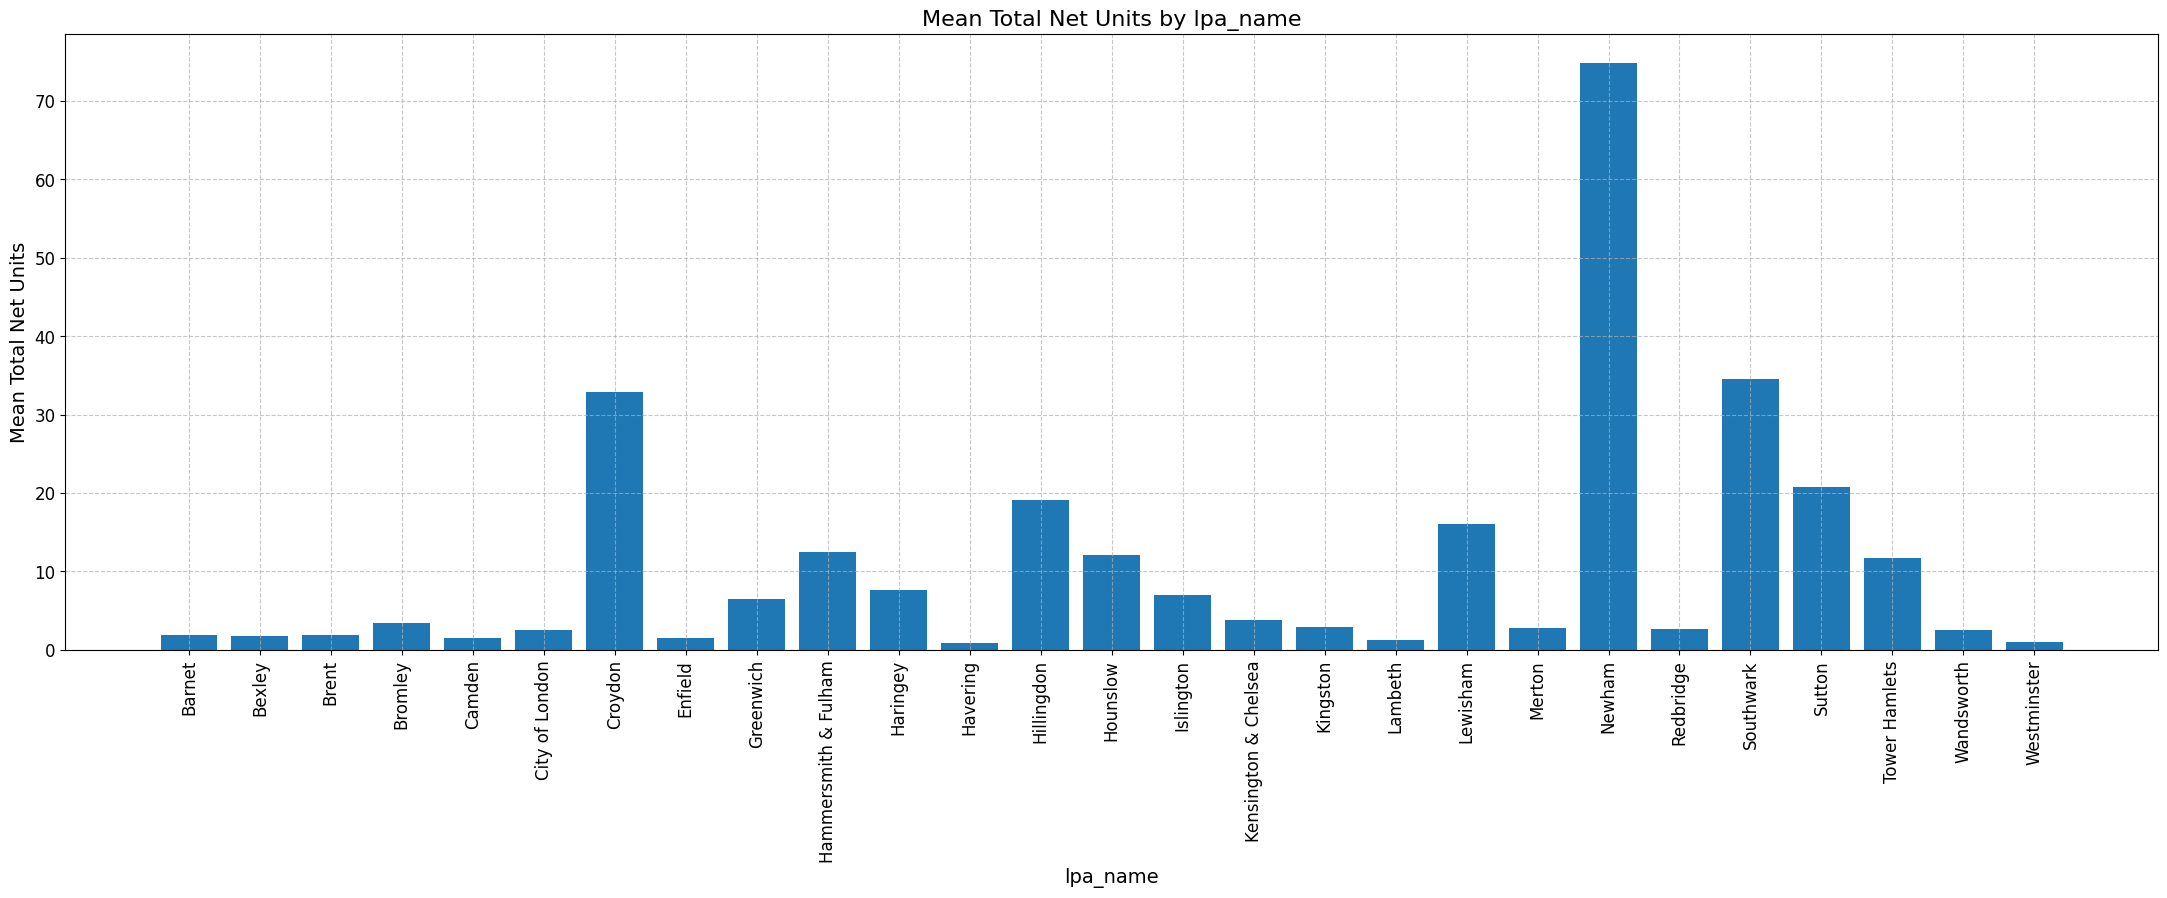

In [12]:
fig = plotgen(hack, 0, test_rec)

In [13]:
explanation = explain_plot(fig)
print("Generated Explanation:")
print(explanation)

Generated Explanation:
## Explanation Refinement

## Overview
The bar chart, titled "Mean Total Net Units by Ipa_name," presents a comprehensive visualization of the mean total net units across various London boroughs. The x-axis lists the borough names (Ipa_name), while the y-axis represents the mean total net units. A total of 32 boroughs are compared, providing a detailed view of the distribution of mean total net units.

## Key Visual Features
- **Dominant Colors**: The chart features blue bars for data representation on a white background. The dominant colors identified are:
  - RGB: [17,17,17] (dark blue or black) for text and grid lines.
  - RGB: [253,253,253] (white or light gray) for the background.
  - RGB: [171,122,51] (brown or beige) is not prominently used but detected in minor elements.
- **Text Elements**: There are 132 text elements (regions) identified, indicating a detailed level of annotation. These include borough names on the x-axis and numerical values on the y-a

In [14]:
explanation = explainer2(fig)
print("Generated Explanation:")
print(explanation)

Generated Explanation:
## Explanation Generation

## Overview
The provided data visualization is a bar chart titled "Mean Total Net Units by Ipa_name". The chart displays the mean total net units for 29 London boroughs, with the x-axis listing the borough names (Ipa_name) and the y-axis representing the mean total net units. The chart uses blue bars to visually represent the data, providing a clear comparison of the mean total net units across different boroughs.

## Key Features
- **X-axis (Ipa_name):** Lists 29 London boroughs, providing a comprehensive overview of the data across different regions.
- **Y-axis (Mean Total Net Units):** Ranges from 0 to 70 units, with Redbridge exceeding this upper limit with a value of approximately 72.14 units.
- **Data Points:** Each borough has a corresponding blue bar indicating its mean total net units, allowing for a straightforward comparison.
- **Notable Outliers:** 
  - Redbridge stands out with a significantly high value of 72.14 mean total

In [15]:
explanation = explainer(fig)
print("Generated Explanation:")
print(explanation)

Generated Explanation:
## Overview

This data visualization presents a bar chart illustrating the mean total net units by London borough, referred to as "lpa_name". The chart provides a comparative view of the mean total net units across various boroughs, allowing for an analysis of the distribution and variation in these values.

## Key Features

- The chart features blue bars representing each borough's mean total net units.
- The y-axis ranges from 0 to 70, with increments of 10, indicating the mean total net units. The unit of measurement for mean total net units is not specified, but it appears to be a count or quantity.
- The x-axis lists 32 London boroughs.
- Notable data points include:
  - Redbridge has the highest mean total net units, approximately 72.
  - Croydon and Southwark have relatively high mean total net units, around 30-35.
  - Several boroughs (Barnet, Bexley, Brent, Bromley, Camden, Enfield, Havering, Hillingdon, Islington, Kingston & Chelsea, Lewisham, Merton, W

In [16]:
explanation1 = explainer(fig, prompt="newham")
print("Generated Explanation with Custom Prompt:")      
print(explanation1)

Generated Explanation with Custom Prompt:
## **Overview**

This visualization presents a bar chart illustrating the mean total net units by London borough, providing insights into the distribution of development or growth across different boroughs. The chart displays 32 London boroughs on the x-axis and the mean total net units on the y-axis, ranging from 0 to 70. This representation allows for a comparison of the average net units across various boroughs, highlighting disparities in development.

## **Key Features**

- The chart features 32 London boroughs listed on the x-axis in no specific order, and the mean total net units on the y-axis, with values ranging from 0 to 70.
- The main visual elements are blue bars representing each borough's mean total net units.
- Notable data points include:
  - Redbridge with the highest mean total net units at approximately 72 units.
  - Croydon with a value of around 32 units.
  - Southwark and Sutton with notable values of around 34 and 12 unit

In [17]:
explanation2 = explainer(fig,iterations=5)
print("Generated Explanation with Custom Iterations:")
print(explanation2)

Generated Explanation with Custom Iterations:
## **Overview**

This data visualization presents a bar chart illustrating the mean total net units across various London boroughs, identified by their `Ipa_name`. The chart provides a comparative analysis of development or housing trends across 32 London boroughs, highlighting significant disparities in activity levels. Although the data source is not explicitly mentioned, it appears to be based on official London borough data, likely from a government or urban planning agency. This comparison is crucial as it reveals varying degrees of development or housing growth across different areas of London, which can inform urban planning and policy decisions.

## **Key Features**

* The x-axis lists 32 London boroughs, identified by their `Ipa_name`, indicating that `Ipa_name` is a unique identifier for each borough. The tick labels on the x-axis are borough names, providing clear identification of each bar.
* The y-axis represents the mean total